In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
energy_df = pd.read_csv('../data_base/paths_energy/joined_energy_pcs.csv', sep=",")
energy_df
reduced_df = energy_df[['Energy']]
time_cumsum_df = energy_df['teo_point_time'].cumsum()
time_cumsum_df = energy_df['Energy'].cumsum()
#energy_df['Total_time'] = time_cumsum_df
energy_df

,Unnamed: 0,path_num,missing_points,teo_point_time,sim_drone_time,teo_point_dist,teo_Xdist,teo_Ydist,teo_point_vel,Energy
0,0,1,4,65,63.150002,5.099020,5,-1,0.078446,5.181615e+08
1,1,1,3,139,135.399994,12.041595,-12,-1,0.086630,4.642819e+08
2,2,1,2,127,122.650024,12.041595,12,-1,0.094816,6.968448e+07
3,3,1,1,115,114.049988,12.041595,-12,-1,0.104710,1.028260e+08
4,4,1,0,118,118.099976,14.422205,12,8,0.122222,1.330626e+08
...,...,...,...,...,...,...,...,...,...,...
2207,2207,193,1,44,99.099976,4.242641,3,3,0.096424,1.918315e+07
2208,2208,193,0,55,130.650146,1.000000,0,-1,0.018182,3.345786e+07
2209,2209,194,9,40,89.700005,3.162278,3,-1,0.079057,1.003411e+07
2210,2210,194,8,46,104.249969,3.000000,-3,0,0.065217,1.449699e+07


<AxesSubplot:xlabel='teo_point_time'>

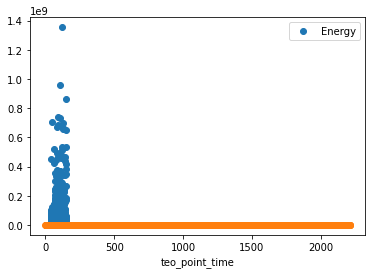

In [8]:
energy_df.plot(x='teo_point_time', y='Energy', style='o')
time_cumsum_df.plot(x='teo_point_time', y='Energy', style='o')

<AxesSubplot:ylabel='Frequency'>

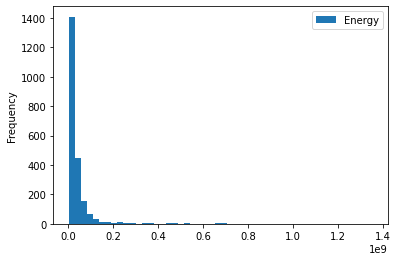

In [5]:
reduced_df.plot.hist(bins=50)

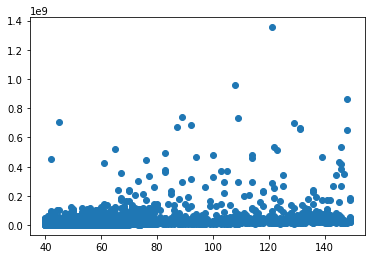

In [7]:
plt.scatter(energy_df['teo_point_time'], energy_df['Energy'])
plt.show() 